In [1]:


import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as pit
from pygments import highlight
from scipy.stats import entropy

In [2]:
df = pd.read_csv("fifa_players.csv")
#df.shape
df

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,15,87,88,24,49,33,80,91,88,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,R. McKenzie,Rory McKenzie,10/7/1993,25,175.26,74.8,"RM,CAM,CM",Scotland,67,70,...,54,69,41,60,64,63,56,40,20,18
17950,M. Sipľak,Michal Sipľak,2/2/1996,23,182.88,79.8,LB,Slovakia,59,67,...,22,62,55,42,39,32,52,53,64,60
17951,J. Bekkema,Jan Bekkema,4/9/1996,22,185.42,89.8,GK,Netherlands,59,67,...,9,27,10,5,25,16,47,9,12,13
17952,A. Al Yami,Abdulrahman Al Yami,6/19/1997,21,175.26,64.9,"ST,LM",Saudi Arabia,59,71,...,58,38,15,54,52,50,53,16,18,17


In [3]:
df["full_name"].str.strip()

0          Lionel Andrés Messi Cuccittini
1            Christian  Dannemann Eriksen
2                              Paul Pogba
3                         Lorenzo Insigne
4                       Kalidou Koulibaly
                       ...               
17949                      Rory  McKenzie
17950                       Michal Sipľak
17951                         Jan Bekkema
17952                 Abdulrahman Al Yami
17953    José Francisco dos Santos Júnior
Name: full_name, Length: 17954, dtype: object

In [4]:
#std_age = df["age"].std()
std_overall = df["overall_rating"].std()
#std_age
std_overall

np.float64(6.9637297873224355)

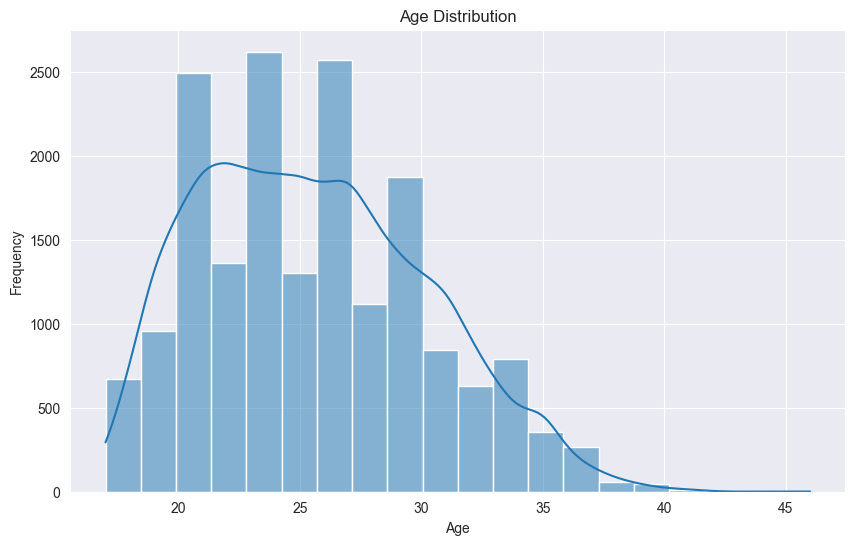

In [5]:
pit.figure(figsize = (10,6))
sns.histplot(df["age"], bins=20, kde=True)
pit.title("Age Distribution")
pit.xlabel("Age")
pit.ylabel("Frequency")
pit.show()

In [6]:
correlation = df[['age', 'overall_rating']].corr()
correlation



,age,overall_rating
age,1.000000,0.461529
overall_rating,0.461529,1.000000


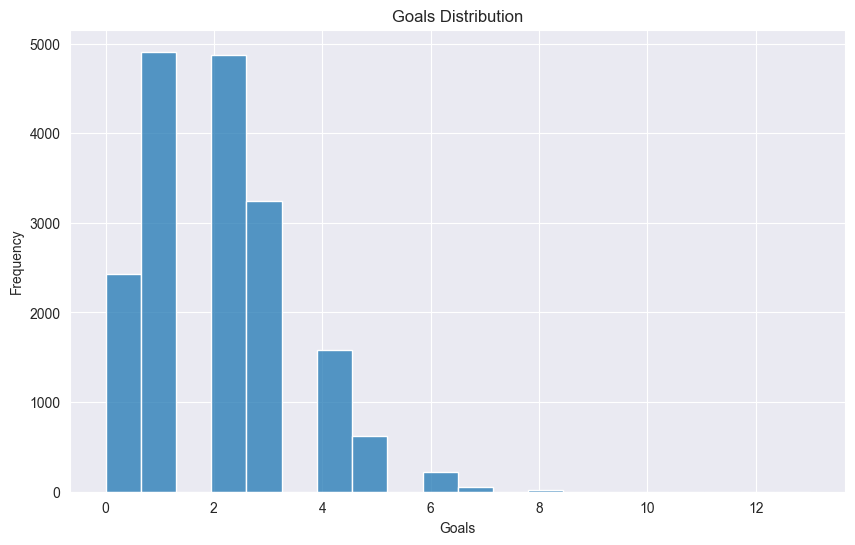

In [7]:
if 'goals' not in df.columns:
    df['goals'] = np.random.poisson(lam = 2, size = len(df))

    pit.figure(figsize = (10,6))
    sns.histplot(df["goals"], bins=20, kde=False)
    pit.title("Goals Distribution")
    pit.xlabel("Goals")
    pit.ylabel("Frequency")
    pit.show()


In [8]:
mean_age = df["age"].mean()
median_age = df["age"].median()

mean_overall = df["overall_rating"].mean()
median_overall = df["overall_rating"].median()

#mean_age
#median_age
#mean_overall
#median_overall

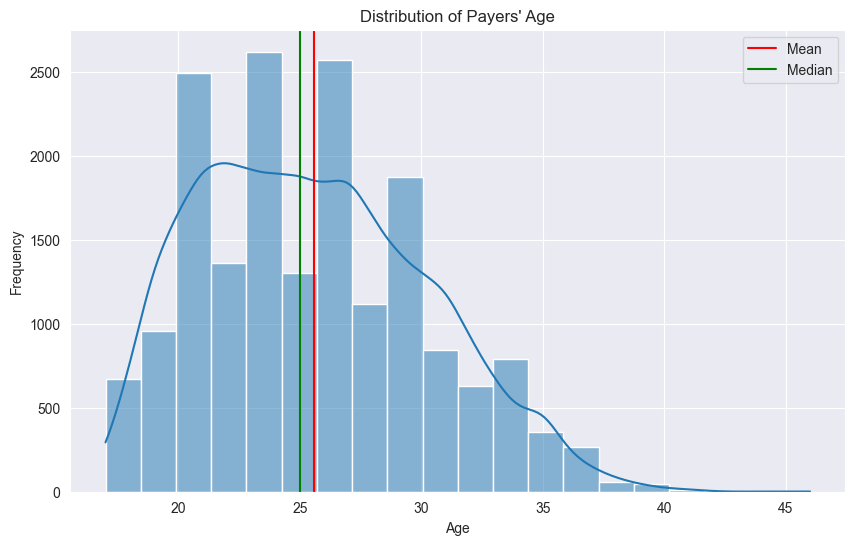

In [9]:
pit.figure(figsize = (10,6))
sns.histplot(df["age"], bins=20, kde=True)
pit.title("Distribution of Payers\' Age")
pit.xlabel("Age")
pit.ylabel("Frequency")
pit.axvline(mean_age, color='red', label='Mean')
pit.axvline(median_age, color='green', label='Median')
pit.legend()
pit.show()

In [10]:
def gini(array):
    array = array.flatten().astype(float)
    if np.amin(array) < 0:
        array -= np.amin(array)
    array += 0.0000001
    array = np.sort(array)
    index = np.arange(1, array.shape[0] + 1)
    n = array.shape[0]

    return (np.sum((2 * index - n - 1) * array)) / (n * np.sum(array))

gini_index = gini(df['overall_rating'].values)
gini_index

np.float64(0.059080790935207926)

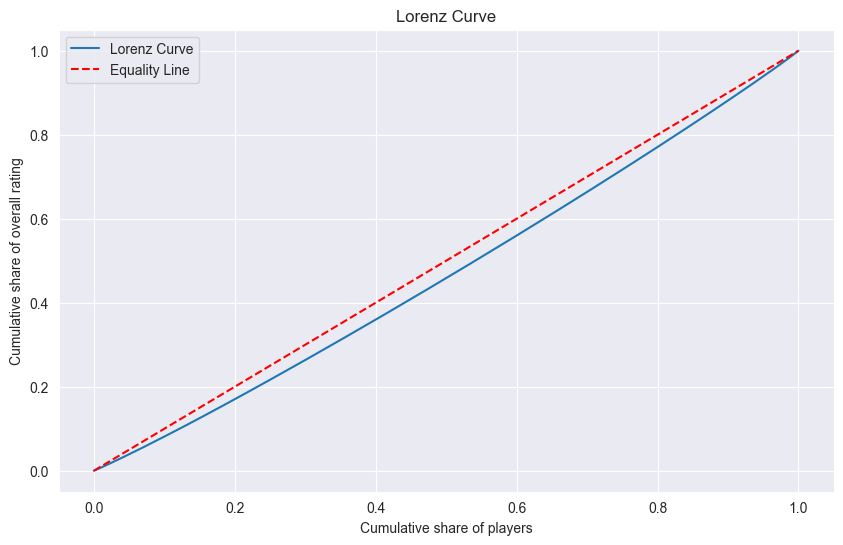

In [11]:
def lorenz_curve(array):
    array = array.flatten().astype(float)
    array = np.sort(array)
    array_cumsum = np.cumsum(array)
    lorenz_curve = array_cumsum / array_cumsum[-1]
    lorenz_curve = np.insert(lorenz_curve, 0, 0)
    return lorenz_curve


lorenz = lorenz_curve(df['overall_rating'].values)


pit.figure(figsize=(10, 6))
pit.plot(np.linspace(0.0, 1.0, lorenz.size), lorenz, label='Lorenz Curve')
pit.plot([0, 1], [0, 1], linestyle='--', color='r', label='Equality Line')
pit.title('Lorenz Curve')
pit.xlabel('Cumulative share of players')
pit.ylabel('Cumulative share of overall rating')
pit.legend()
pit.show()

In [12]:
def calculate_entropy(column):
    values_counts = column.value_counts()
    probabilities = values_counts / len(column)
    return entropy(probabilities)

overall_rating_entropy = calculate_entropy(df['overall_rating'])
overall_rating_entropy


np.float64(3.351809661598563)

In [13]:
def information_gain(df,overall_rating_col, target_col):
    overall_rating_entropy = calculate_entropy(df[overall_rating_col])
    target_entropy = calculate_entropy(df[target_col])

    joint_entropy = calculate_entropy(df[[overall_rating_col, target_col]])

    return overall_rating_entropy - joint_entropy

gain = information_gain(df, 'overall_rating', 'value_euro')
gain

np.float64(-3.1717363707311623)

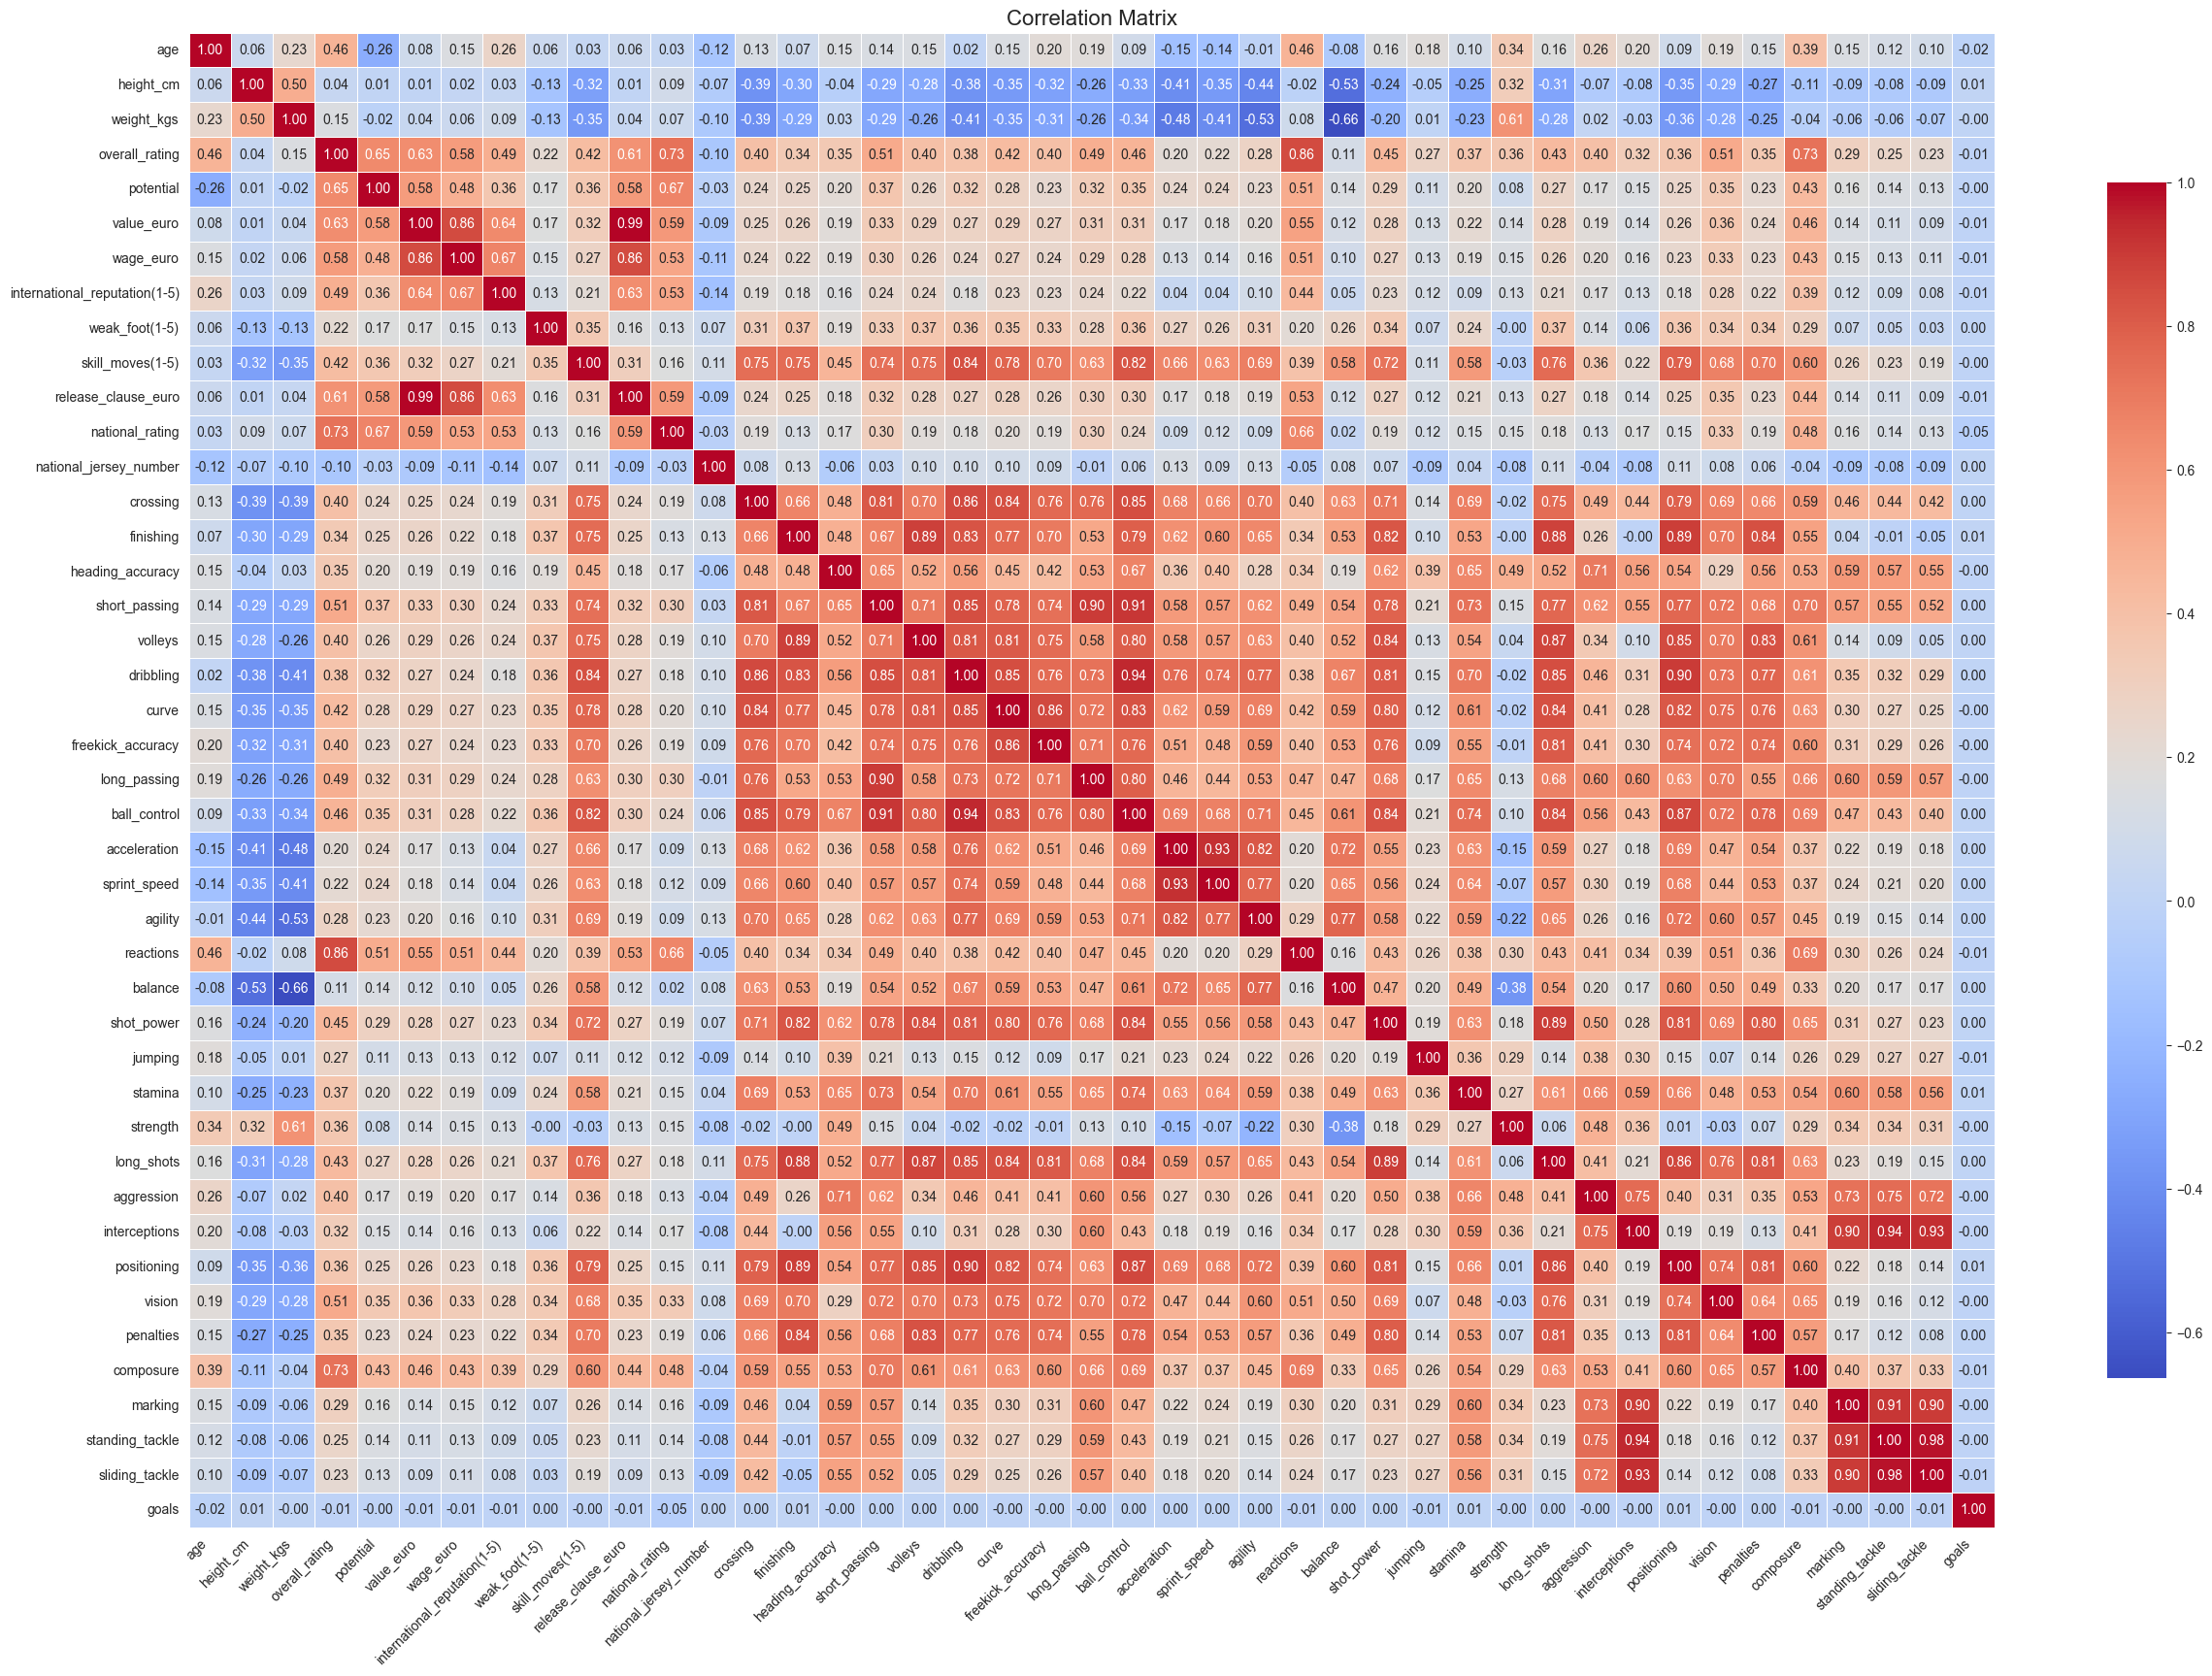

In [14]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()

# Plot heatmap with improved formatting
pit.figure(figsize=(30, 20))  # Adjust figure size
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",  # Format values to 2 decimal places
    cmap='coolwarm',  # Use a diverging color palette
    cbar_kws={'shrink': 0.8},  # Adjust color bar size
    linewidths=0.5  # Add space between cells
)
pit.title('Correlation Matrix', fontsize=16)  # Add a title with larger font size
pit.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
pit.yticks(rotation=0)  # Keep y-axis labels horizontal
pit.show()